Use Python to fetch country debt profiles. Use a horizontal bar chart, the y-axis is the list of all countries in the world (for example, Japan, Korea, Philippines, China, and more), and the x-axis is the total debt in $.  Make a ranking label on the outside and the right part of the bar, followed by the number of debt$ label

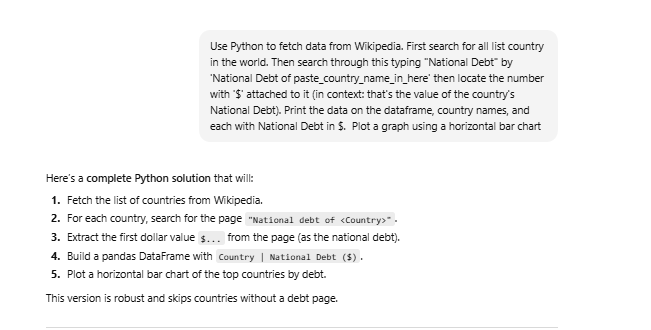
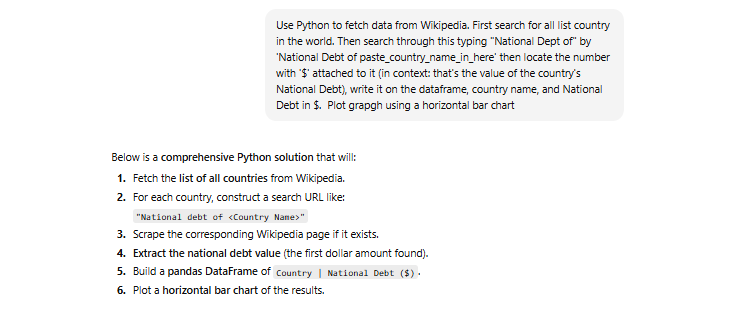

import wikipediaapi
import re
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Wikipedia API
wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='NationalDebtFetcher/1.0'
)

# Full country list (unchanged)
countries = [
    "Afghanistan","Albania","Algeria","Andorra","Angola","Antigua and Barbuda",
    "Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain",
    "Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia",
    "Bosnia and Herzegovina","Botswana","Brazil","Brunei","Bulgaria","Burkina Faso",
    "Burundi","Cambodia","Cameroon","Canada","Cape Verde","Central African Republic",
    "Chad","Chile","China","Colombia","Comoros",
    "Congo, Democratic Republic of the","Congo, Republic of the",
    "Costa Rica","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti",
    "Dominica","Dominican Republic","Ecuador","Egypt","El Salvador",
    "Equatorial Guinea","Eritrea","Estonia","Eswatini","Ethiopia","Fiji","Finland",
    "France","Gabon","Gambia","Georgia","Germany","Ghana","Greece","Grenada",
    "Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary",
    "Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy",
    "Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati",
    "Kuwait","Kyrgyzstan","Laos","Latvia","Lebanon","Lesotho","Liberia","Libya",
    "Liechtenstein","Lithuania","Luxembourg","Madagascar","Malawi","Malaysia",
    "Maldives","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Mexico",
    "Micronesia","Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique",
    "Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua",
    "Niger","Nigeria","North Korea","North Macedonia","Norway","Oman","Pakistan",
    "Palau","Palestine","Panama","Papua New Guinea","Paraguay","Peru","Philippines",
    "Poland","Portugal","Qatar","Romania","Russia","Rwanda",
    "Saint Kitts and Nevis","Saint Lucia","Saint Vincent and the Grenadines",
    "Samoa","San Marino","Saudi Arabia","Senegal","Serbia","Seychelles",
    "Sierra Leone","Singapore","Slovakia","Slovenia","Solomon Islands","Somalia",
    "South Africa","South Korea","South Sudan","Spain","Sri Lanka","Sudan",
    "Suriname","Sweden","Switzerland","Syria","São Tomé and Príncipe","Tajikistan",
    "Tanzania","Thailand","Timor-Leste","Togo","Tonga","Trinidad and Tobago",
    "Tunisia","Turkey","Turkmenistan","Tuvalu","Uganda","Ukraine",
    "United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan",
    "Vanuatu","Vatican City","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"
]

# Function to extract national debt
def get_national_debt(country):
    titles = [
        f"National debt of {country}",
        f"Government debt of {country}"
    ]
    for title in titles:
        page = wiki.page(title)
        if page.exists():
            match = re.search(r'\$\s*[\d,]+', page.text)
            if match:
                return int(match.group().replace('$', '').replace(',', ''))
    return None

# Fetch data
records = []
for c in countries:
    debt = get_national_debt(c)
    records.append({
        "Country": c,
        "National Debt ($)": debt
    })

# DataFrame
df = pd.DataFrame(records)
df = df.dropna().sort_values("National Debt ($)", ascending=False)

print(df)

# Plot (horizontal bar chart)
plt.figure(figsize=(14, 12))
plt.barh(df["Country"], df["National Debt ($)"])
plt.xlabel("National Debt ($)")
plt.title("National Debt by Country (Wikipedia)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
